#**Classification of histopathology images**
## Shay Shtern - 205891294 Coral Ifergan - 311366728


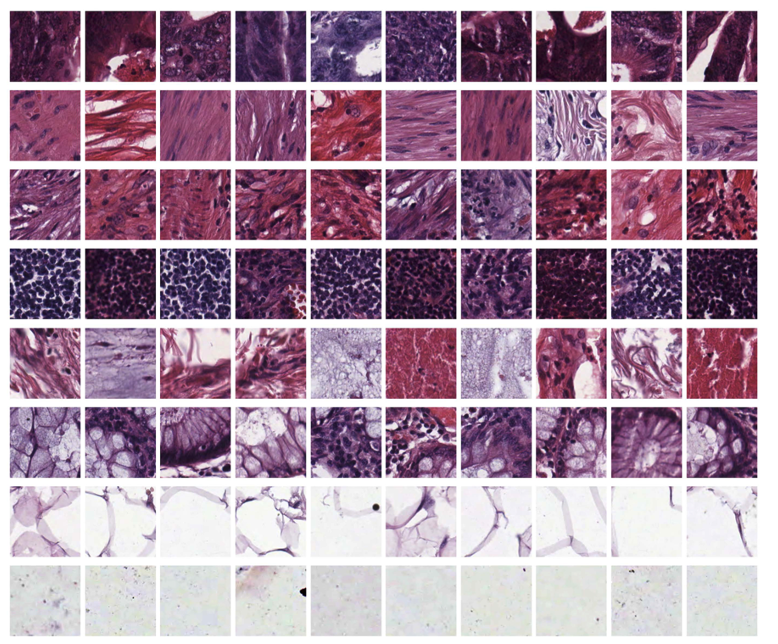

In [ ]:
from IPython.display import Image
Image(url='https://s6.gifyu.com/images/SarcasticHelpfulDiscus-mobile.gif')

# Import Libraries:

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D,Dropout,GlobalMaxPooling2D, InputLayer

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
import time
import seaborn as sns
from termcolor import colored
from glob import glob
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec

In [ ]:
print(tfds.__version__)

4.0.1


# **Part I**: colorectal_histology dataset 

### Pre-defined functions for Part I

In [ ]:
def plot_results(history):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'],':r')
    plt.plot(history.history['val_loss'],'.-r')
    plt.title('Loss',fontsize=14)
    plt.xlabel('Epochs',fontsize=14)
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'],':b')
    plt.plot(history.history['val_accuracy'],'b')
    plt.ylim([0, 1])
    plt.title('Accuracy',fontsize=14)
    plt.xlabel('Epochs',fontsize=14)
    plt.grid()

# Loading the data: Original tfds method 

In [ ]:
# load data 5000 pics size 150x150x3

ds, info = tfds.load(
    'colorectal_histology',
    split='train',
    shuffle_files=True,
    with_info=True,
    as_supervised=True)


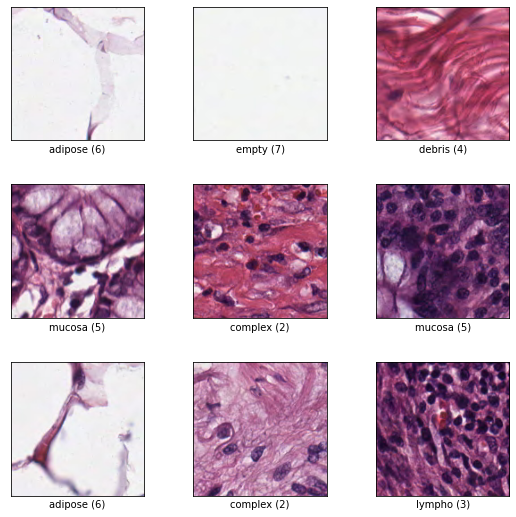

In [ ]:
fig = tfds.show_examples(ds, info)

## Load The Data with numpy:

In [ ]:
# We found its easyer to load the data with numpy!

# load data 5000 pics size 150x150x3 as numpy

images, labels = tfds.as_numpy(tfds.load(
    'colorectal_histology',
    split='train',
    batch_size=-1,
    shuffle_files=True,
    as_supervised=True,
))

print(type(images), images.shape)

<class 'numpy.ndarray'> (5000, 150, 150, 3)


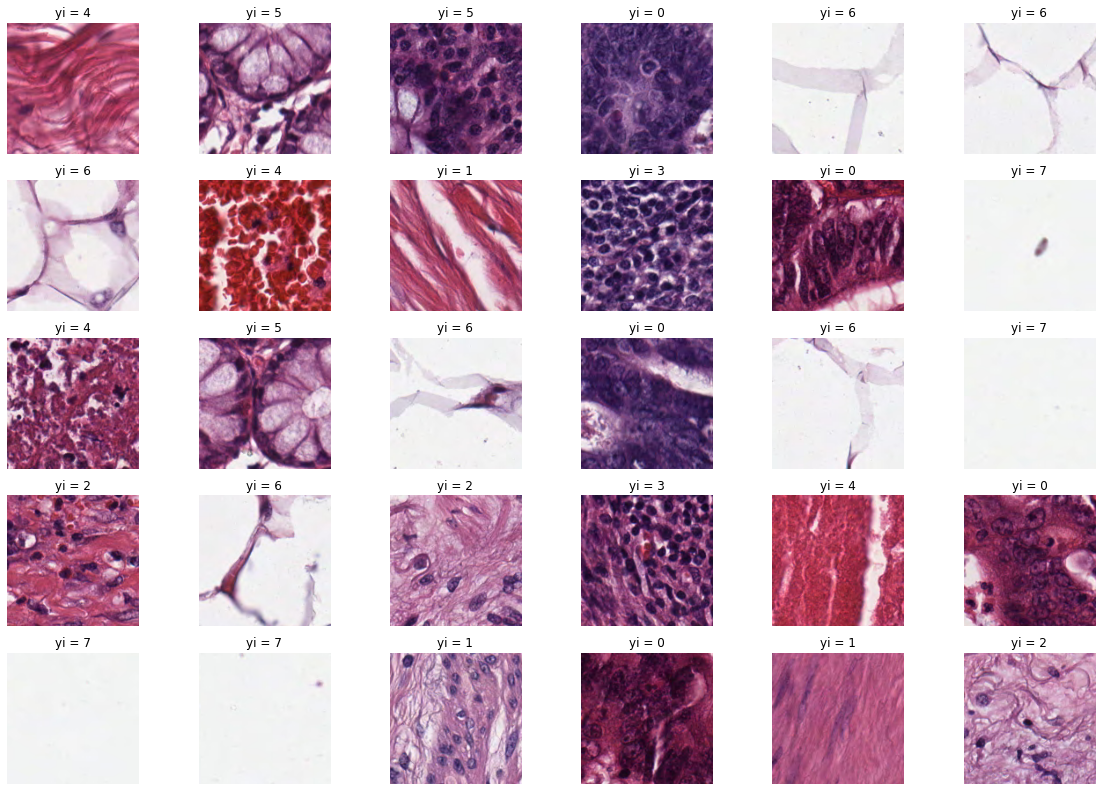

In [ ]:
# Show the first 30 examples with their labels
plt.figure(figsize=(20,14))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(f'yi = {labels[i]}')

# Split The Data:

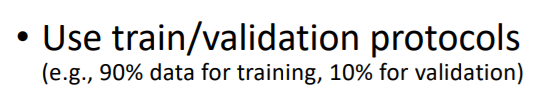

In [ ]:
# 4500 for the train set and 500 for the test set

split1 = int(images.shape[0] * 0.9)
split2 = int(images.shape[0] * 0.1)

x_train = images[:split1]
y_train = labels[:split1]
x_test = images[-split2:]
y_test = labels[-split2:]

print("x train shape =", x_train.shape)
print("y train shape =",y_train.shape)
print("x test shape =",x_test.shape)
print("y test shape =",y_test.shape)

x train shape = (4500, 150, 150, 3)
y train shape = (4500,)
x test shape = (500, 150, 150, 3)
y test shape = (500,)


# Build different models 


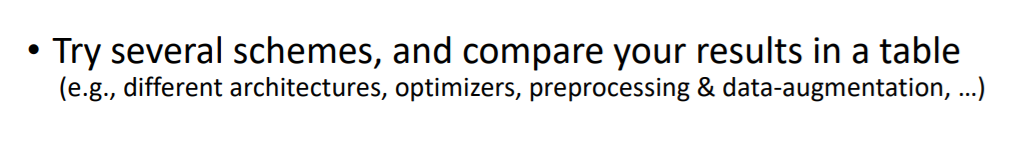

## Model 1: Simple CNN customized Model

In [ ]:
model_1 = Sequential()

model_1.add(Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(150,150,3))) 
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(64, (3, 3), activation='relu',padding='same')) 
model_1.add(MaxPooling2D((2, 2)))

model_1.add(Flatten())
model_1.add(Dense(128,activation='relu'))
model_1.add(Dense(8, activation='softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               11214976  
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 1

### Training the model with the Adam optimizer


In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model_1.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(x_train, y_train, batch_size=20, epochs=7, 
                    validation_data=(x_test, y_test))

Epoch 1/7
225/225 [==============================] - 11s 17ms/step - loss: 24.0629 - accuracy: 0.4204 - val_loss: 3.7031 - val_accuracy: 0.4680
Epoch 2/7
225/225 [==============================] - 4s 16ms/step - loss: 1.7897 - accuracy: 0.6249 - val_loss: 1.2308 - val_accuracy: 0.6840
Epoch 3/7
225/225 [==============================] - 4s 16ms/step - loss: 0.6193 - accuracy: 0.8053 - val_loss: 1.0739 - val_accuracy: 0.7040
Epoch 4/7
225/225 [==============================] - 4s 17ms/step - loss: 0.4110 - accuracy: 0.8662 - val_loss: 1.0395 - val_accuracy: 0.7080
Epoch 5/7
225/225 [==============================] - 4s 16ms/step - loss: 0.1765 - accuracy: 0.9453 - val_loss: 1.0403 - val_accuracy: 0.7300
Epoch 6/7
225/225 [==============================] - 4s 16ms/step - loss: 0.1109 - accuracy: 0.9658 - val_loss: 0.9435 - val_accuracy: 0.7520
Epoch 7/7
225/225 [==============================] - 4s 16ms/step - loss: 0.0684 - accuracy: 0.9802 - val_loss: 1.0740 - val_accuracy: 0.7160


### Visualize the Results

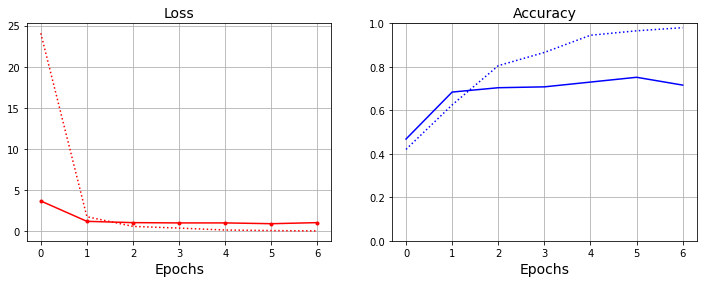

In [ ]:
plot_results(history)

### Confusion matrix for Model1

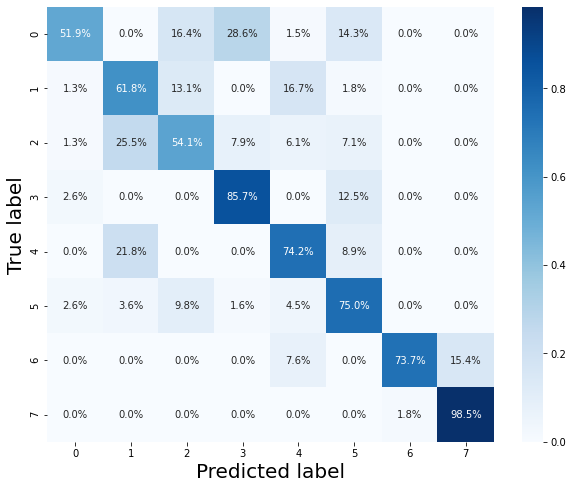

In [ ]:
y_hat = model_1.predict(x_test)
y_hat = np.argmax(y_hat, axis=1)
CM = confusion_matrix(y_test, y_hat)
CM = CM / CM.sum(axis=1)

plt.figure(figsize=(10,8))
heatmap(CM,cmap='Blues',annot=True, fmt='.1%')
plt.xlabel('Predicted label', fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.show()

### Test one example with Model_1

The real lable of the image: 5


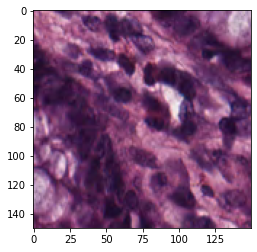

In [ ]:
image_to_test = x_test[2]
image_to_test.shape
plt.imshow(image_to_test)
print("The real lable of the image:",y_test[2])

In [ ]:
yhat = model_1.predict(image_to_test[None])
yhat
print("The predicted lable of the image:",np.argmax(yhat))

The predicted lable of the image: 5


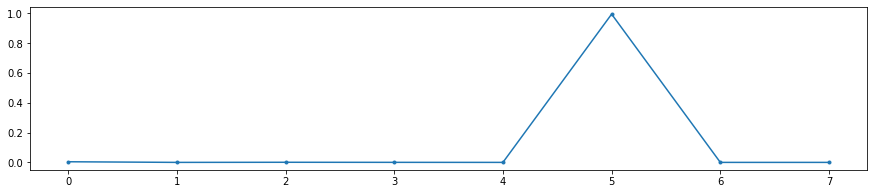

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(yhat[0],'.-')

## Model 2: A more complex CNN Model

In [ ]:
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(150,150,3))) 
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3, 3), activation='relu',padding='same')) 
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(256, (3, 3), activation='relu',padding='same')) 
model_2.add(MaxPooling2D((2, 2)))

model_2.add(Flatten())
model_2.add(Dense(128,activation='relu'))
model_2.add(Dense(8, activation='softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 256)      

### Training the model with the SGD optimizer


In [ ]:
opt = keras.optimizers.SGD(
    learning_rate=0.0001, momentum=0.5, nesterov=False, name="SGD")

model_2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_2.fit(x_train, y_train, batch_size=50, epochs=22, 
                    validation_data=(x_test, y_test))

Epoch 1/22
90/90 [==============================] - 5s 46ms/step - loss: 3.3361 - accuracy: 0.4096 - val_loss: 1.1714 - val_accuracy: 0.5020
Epoch 2/22
90/90 [==============================] - 4s 45ms/step - loss: 1.0331 - accuracy: 0.5860 - val_loss: 0.9694 - val_accuracy: 0.6440
Epoch 3/22
90/90 [==============================] - 4s 45ms/step - loss: 0.9119 - accuracy: 0.6560 - val_loss: 0.8718 - val_accuracy: 0.6500
Epoch 4/22
90/90 [==============================] - 4s 45ms/step - loss: 0.8361 - accuracy: 0.6791 - val_loss: 0.8703 - val_accuracy: 0.6620
Epoch 5/22
90/90 [==============================] - 4s 45ms/step - loss: 0.8074 - accuracy: 0.7004 - val_loss: 0.8240 - val_accuracy: 0.7000
Epoch 6/22
90/90 [==============================] - 4s 45ms/step - loss: 0.7514 - accuracy: 0.7169 - val_loss: 0.7884 - val_accuracy: 0.7020
Epoch 7/22
90/90 [==============================] - 4s 46ms/step - loss: 0.7301 - accuracy: 0.7238 - val_loss: 0.7664 - val_accuracy: 0.7080
Epoch 8/22
90

### Visualize the Results:

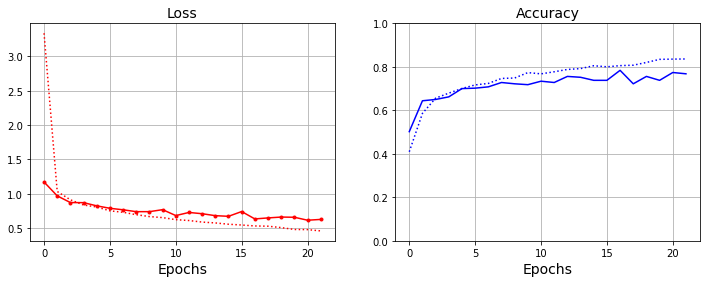

In [ ]:
plot_results(history)

### Confusion matrix

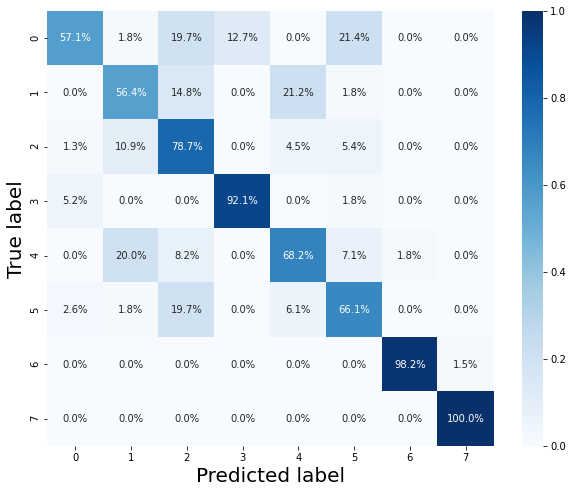

In [ ]:
y_hat = model_2.predict(x_test)
y_hat = np.argmax(y_hat, axis=1)
CM = confusion_matrix(y_test, y_hat)
CM = CM / CM.sum(axis=1)

plt.figure(figsize=(10,8))
heatmap(CM,cmap='Blues',annot=True, fmt='.1%')
plt.xlabel('Predicted label', fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.show()

**Test one example with Model2**

The real lable of the image: 5


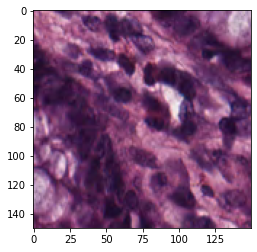

In [ ]:
image_to_test = x_test[2]
image_to_test.shape
plt.imshow(image_to_test)
print("The real lable of the image:",y_test[2])

In [ ]:
yhat = model_2.predict(image_to_test[None])
yhat
print("The predicted lable of the image:",np.argmax(yhat))

The predicted lable of the image: 5


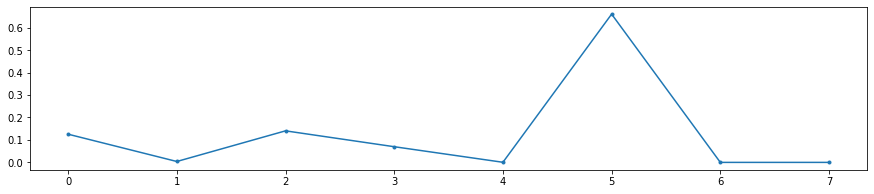

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(yhat[0],'.-')

## Model 3: Using the Transfer-learning technique. VGG16 will be used as the pre-trained model architecture 

**Using data augmentation to get mora data**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    zoom_range=0.1)


data_generator = datagen.flow(x_train, y_train, batch_size=32) 
test_dataGen = ImageDataGenerator(rescale=1./255)
test_generator= datagen.flow(x_test, y_test, batch_size=32)


**Get one batch from the data_generator and plot it**

x_batch.shape =  (32, 150, 150, 3)
y_batch.shape =  (32,)


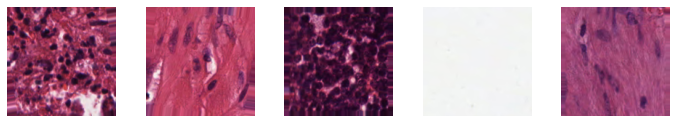

In [ ]:
x_batch, y_batch = data_generator.next()
plt.figure(figsize=(12,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')

print('x_batch.shape = ',x_batch.shape)
print('y_batch.shape = ',y_batch.shape)

**Creating Model3: VGG16 (not including it's top) is added as the first layer to  Model3, frozen.**

In [ ]:
model_3 = Sequential()

from tensorflow.keras.applications.vgg16 import VGG16
model_3.add(VGG16(include_top=False, input_shape=(150,150,3)))
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(8, activation="softmax"))

# Freeze the weights in the first layer
model_3.layers[0].trainable = False
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 2056      
Total params: 16,814,152
Trainable params: 2,099,464
Non-trainable params: 14,714,688
_________________________________________________________________


**Train Model3's top (while the VGG16 layers are frozen) and visualize the results**

Epoch 1/5
140/140 [==============================] - 33s 208ms/step - loss: 1.0918 - accuracy: 0.6368 - val_loss: 0.5181 - val_accuracy: 0.8300
Epoch 2/5
140/140 [==============================] - 25s 180ms/step - loss: 0.6734 - accuracy: 0.7630 - val_loss: 0.3789 - val_accuracy: 0.8640
Epoch 3/5
140/140 [==============================] - 27s 191ms/step - loss: 0.5864 - accuracy: 0.7954 - val_loss: 0.4285 - val_accuracy: 0.8440
Epoch 4/5
140/140 [==============================] - 26s 183ms/step - loss: 0.5638 - accuracy: 0.8145 - val_loss: 0.3766 - val_accuracy: 0.8500
Epoch 5/5
140/140 [==============================] - 27s 193ms/step - loss: 0.5358 - accuracy: 0.8091 - val_loss: 0.3523 - val_accuracy: 0.8680


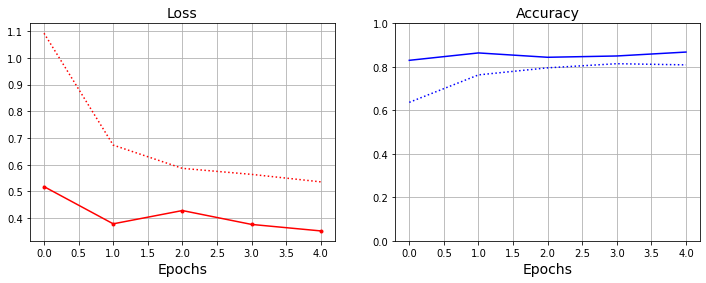

In [ ]:
model_3.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history1 = model_3.fit(data_generator, epochs=5,steps_per_epoch=4500//32,validation_data=test_generator)
plot_results(history1)

**Unfreeze VGG16 layers and train Model3 again, visualize the results**

Epoch 1/10
140/140 [==============================] - 40s 261ms/step - loss: 0.4762 - accuracy: 0.8427 - val_loss: 0.3141 - val_accuracy: 0.8880
Epoch 2/10
140/140 [==============================] - 35s 250ms/step - loss: 0.3631 - accuracy: 0.8756 - val_loss: 0.2760 - val_accuracy: 0.9080
Epoch 3/10
140/140 [==============================] - 35s 249ms/step - loss: 0.3199 - accuracy: 0.8957 - val_loss: 0.2603 - val_accuracy: 0.9060
Epoch 4/10
140/140 [==============================] - 35s 251ms/step - loss: 0.2978 - accuracy: 0.8993 - val_loss: 0.3593 - val_accuracy: 0.8720
Epoch 5/10
140/140 [==============================] - 34s 243ms/step - loss: 0.2781 - accuracy: 0.9089 - val_loss: 0.2336 - val_accuracy: 0.9240
Epoch 6/10
140/140 [==============================] - 35s 251ms/step - loss: 0.2333 - accuracy: 0.9201 - val_loss: 0.2105 - val_accuracy: 0.9160
Epoch 7/10
140/140 [==============================] - 34s 244ms/step - loss: 0.2517 - accuracy: 0.9165 - val_loss: 0.1882 - val_ac

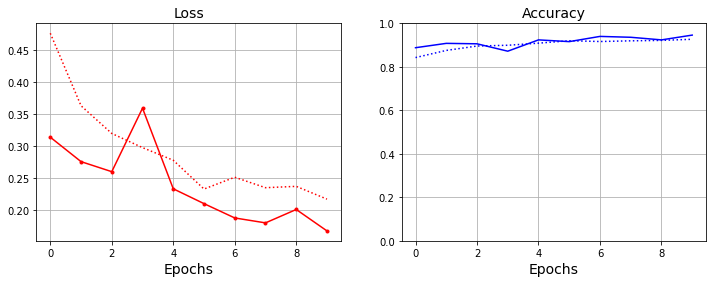

In [ ]:
model_3.layers[0].trainable = True
opt = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)
model_3.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history2 = model_3.fit(data_generator, steps_per_epoch=4500//32, epochs=10,validation_data=test_generator)
plot_results(history2)

### Confusion matrix

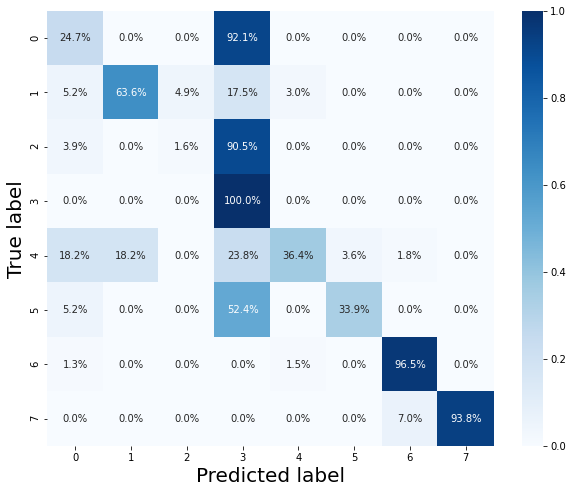

In [ ]:
y_hat = model_3.predict(x_test)
y_hat = np.argmax(y_hat, axis=1)
CM = confusion_matrix(y_test, y_hat)
CM = CM / CM.sum(axis=1)

plt.figure(figsize=(10,8))
heatmap(CM,cmap='Blues',annot=True, fmt='.1%')
plt.xlabel('Predicted label', fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.show()

As we can see, Model3 seem to be focusing on specific classes (i.e., class 3). Perhaps it is because the task here (cells) is completely different than what the VGG16 is trained on (the different imagenet classes). In addition, our dataset might not be well-balanced (fewer tumor examples)

### Test one example with Model3

The real lable of the image: 5


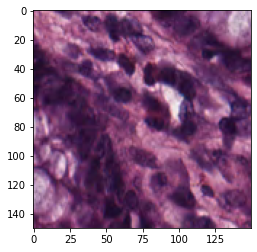

In [ ]:
image_to_test = x_test[2]
image_to_test.shape
plt.imshow(image_to_test)
print("The real lable of the image:",y_test[2])

In [ ]:
yhat = model_3.predict(image_to_test[None])
yhat
print("The predicted lable of the image:",np.argmax(yhat))

The predicted lable of the image: 3


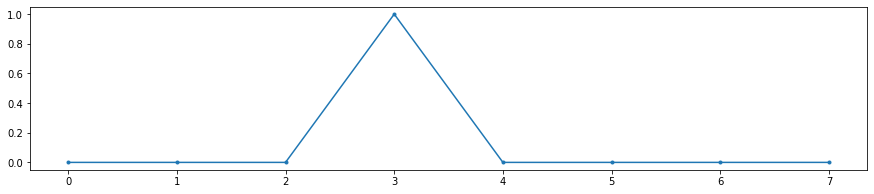

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(yhat[0],'.-')

## Summarize Results: 

Summarize your findings in the table below (edit this markdown cell).

<table>
  <tr>
    <th>Model</th>
    <th>#parameters</th>
    <th>batch-size</th>
    <th>epochs</th>
    <th>accuracy</th>
  </tr>
    
  <tr> 
    <td> 1 </td>   <!-- Model -->
    <td> 11,235,400 </td> <!-- #parameters -->
    <td> 20 </td> <!-- batch-size -->
    <td> 7 </td> <!-- epochs -->
    <td> 0.71 </td> <!-- accuracy -->
  </tr>

  <tr> 
    <td> 2 </td>   <!-- Model -->
    <td> 3,043,784 </td> <!-- #parameters -->
    <td> 50 </td> <!-- batch-size -->
    <td> 22 </td> <!-- epochs -->
    <td> 0.76 </td> <!-- accuracy -->
  </tr>

  <tr> 
    <td> 3 </td>   <!-- Model -->
    <td> 2,099,464 </td> <!-- #parameters -->
    <td> 50 </td> <!-- batch-size -->
    <td> --- </td> <!-- epochs -->
    <td> 0.8 </td> <!-- accuracy -->
  </tr> 
    
 
</table>



 **In conclusion**

Model2 seems to predict the best so far, judging by the accuracy and the confusion matrix 

## **PCA Analysis: Model2**

In [ ]:
from sklearn.decomposition import PCA
features_extractor = keras.Model(inputs=model_2.inputs, outputs=model_2.layers[-2].output)
features_4096D = features_extractor.predict(x_test)
features_4096D.shape

(500, 128)

In [ ]:
pca = PCA(n_components=2).fit(features_4096D)
features_2D = pca.transform(features_4096D)
features_2D.shape

(500, 2)

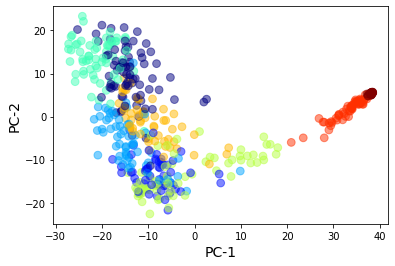

In [ ]:
plt.scatter(features_2D[:,0], features_2D[:,1], s=60, c=y_test, 
            cmap='jet', alpha=0.5)

plt.xlabel('PC-1',fontsize=14)
plt.ylabel('PC-2',fontsize=14)
plt.show()

# **Part II: colorectal_histology_large**

**Load the large 10 images: each of size (5000x5000x3)**

In [ ]:
ds = tfds.load(
    'colorectal_histology_large',
    split='test')

ds_numpy = tfds.as_numpy(ds)
large_images = []
for ex in ds_numpy:
  large_images.append( list(ex.values())[1] )

**Plot all 10 large images**


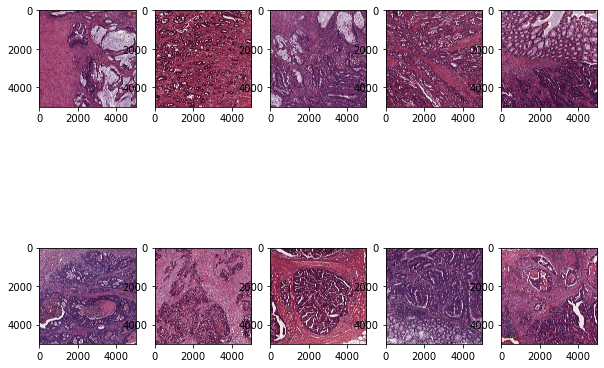

In [ ]:
plt.figure(figsize=(10,8))

for i in range (1,11):
  plt.subplot(2,5,i)
  plt.imshow(large_images[i-1])

In [ ]:
classes = ['Tumor=0', 'Stroma=1', 'Complex=2', 'Lympho=3', 'Debris=4', 'Muscosa=5', 'Adipose=6', 'Empty=7']
tissue_types = [i.split('=')[1] for i in classes]
print(tissue_types)

['0', '1', '2', '3', '4', '5', '6', '7']


**Use a palette of colors (hsv) to color the 150x150 patches of the large images according to their classification (using Model2)**

In [ ]:
palette = sns.color_palette('hls', 8)
cmap = ListedColormap(palette)
palette

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

**The painting function**

Calling the function

In [ ]:
def paint_on_large_image(large_image, model):
  start_x = 0
  start_y = 0
  pred=[]
  new_image_color = large_image.copy()
  new_image_heatmap = large_image.copy()

  while(start_x + 150 < 5000):
    keep_painting = True
    while(keep_painting):
      patch_to_predict = large_image[start_x:start_x+150, start_y:start_y+150]
      predict_vector= model.predict(patch_to_predict[None])
      p_tumor_percentage = predict_vector[0][0]
      pred.append(p_tumor_percentage)
      class_prediction = np.argmax(predict_vector)
      new_image_color[start_x:start_x+150, start_y:start_y+150] = (palette[class_prediction][0]*255,palette[class_prediction][1]*255,palette[class_prediction][2]*255)
      new_image_heatmap[start_x:start_x+150, start_y:start_y+150] = (p_tumor_percentage*255, 0, 0)
      start_y += 75
      if(5000 < start_y + 150):

        keep_painting = False
        patch_to_predict = large_image[start_x:start_x+150, start_y-25:]
        predict_vector= model.predict(patch_to_predict[None])
        p_tumor_percentage = predict_vector[0][0]
        pred.append(p_tumor_percentage)
        class_prediction = np.argmax(predict_vector)
        new_image_color[start_x:start_x+150, start_y-25:] = (palette[class_prediction][0]*255,palette[class_prediction][1]*255,palette[class_prediction][2]*255)
        new_image_heatmap[start_x:start_x+150, start_y-25:] = (p_tumor_percentage*255, 0, 0)
        start_x += 75
        start_y = 0

  keep_painting = True
  start_x = 5000-150
  start_y = 0
  while(keep_painting):
    patch_to_predict = large_image[start_x:start_x+150, start_y:start_y+150]
    predict_vector= model.predict(patch_to_predict[None])
    p_tumor_percentage = predict_vector[0][0]
    pred.append(p_tumor_percentage)
    class_prediction = np.argmax(predict_vector)
    new_image_color[start_x:start_x+150, start_y:start_y+150] = (palette[class_prediction][0]*255,palette[class_prediction][1]*255,palette[class_prediction][2]*255)
    new_image_heatmap[start_x:start_x+150, start_y:start_y+150]= (p_tumor_percentage*255, 0, 0)
    start_y += 75
    if(5000 < start_y + 150):
      keep_painting = False
      patch_to_predict = large_image[start_x:start_x+150, start_y-25:]
      predict_vector= model.predict(patch_to_predict[None])
      p_tumor_percentage = predict_vector[0][0]
      pred.append(p_tumor_percentage)
      class_prediction = np.argmax(predict_vector)
      new_image_color[start_x:start_x+150, start_y-25:] =  (palette[class_prediction][0]*255,palette[class_prediction][1]*255,palette[class_prediction][2]*255)
      new_image_heatmap[start_x:start_x+150, start_y-25:]= (p_tumor_percentage*255, 0, 0)
  return new_image_color,new_image_heatmap,pred


In [ ]:
def plot_results(large_image):
    original_img=large_image.copy()
    img_color, image_heatmap,pred= paint_on_large_image(large_image,model_2)
    fig = plt.figure(figsize=(16,12))
    gs = GridSpec(1, 5, width_ratios=[3,3,3,1,1]) 
    ax = fig.add_subplot(gs[0])
    plt.imshow(original_img)
    ax.set_title('Original image', fontsize=10)


    ax = fig.add_subplot(gs[1])
    ax.set_title('Painted image', fontsize=10)
    colormap=plt.imshow(img_color, cmap=cmap)
    ax = fig.add_subplot(gs[3], xticks=[], yticks=[])
    ax.axis('off')
    cbar = plt.colorbar(colormap)
    cbar.set_ticks([0,1,2,3,4,5,6,7])
    for index, label in enumerate(classes):
      cbar.ax.text(10, (33* index+195)/2.02 , label, ha='left', va='center')

    ax = fig.add_subplot(gs[2])
    ax.set_title('Probability for a Tumor - HeatMap', fontsize=10)
    image_heatmap=plt.imshow(image_heatmap[:,:,0], cmap='hot')

    ax = fig.add_subplot(gs[4], xticks=[], yticks=[])
    ax.axis('off')
    cbar2 = plt.colorbar(image_heatmap,ticks=[0, 0.2, 0.4,0.6,0.8,1.0])
    cbar2.ax.set_yticklabels(['0', '0.2', ' 0.4','0.6','0.8','1'])  # vertically oriented colorbar

    for index, label in enumerate([0, 0.2, 0.4,0.6,0.8,1.0]):
      cbar2.ax.text(10, (33* index+195)/2.02 , label, ha='left', va='center')


**Image No.1**

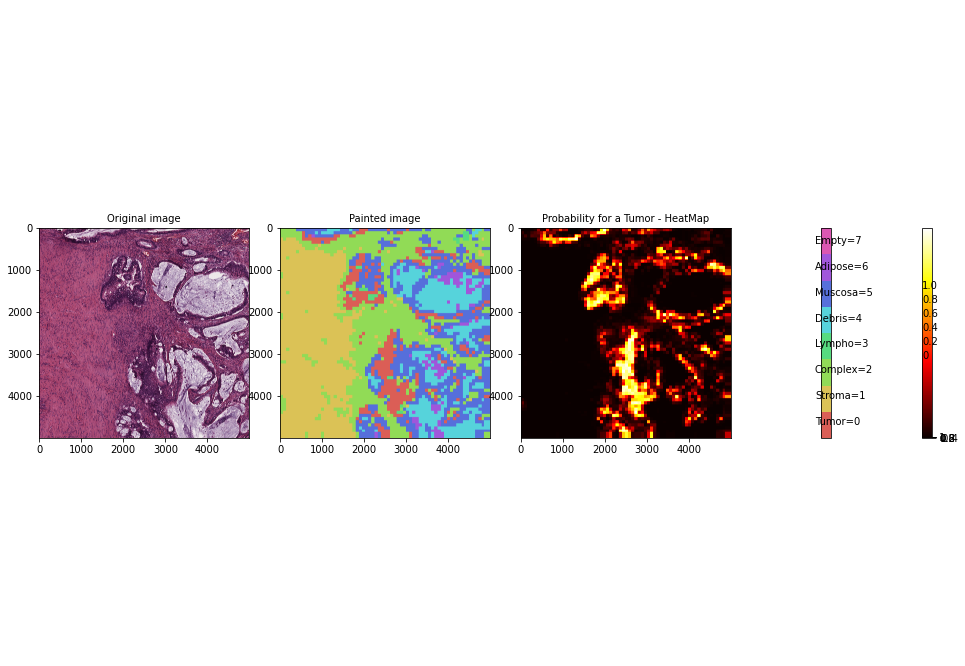

In [ ]:
plot_results(large_images[0])

**Image No.2**

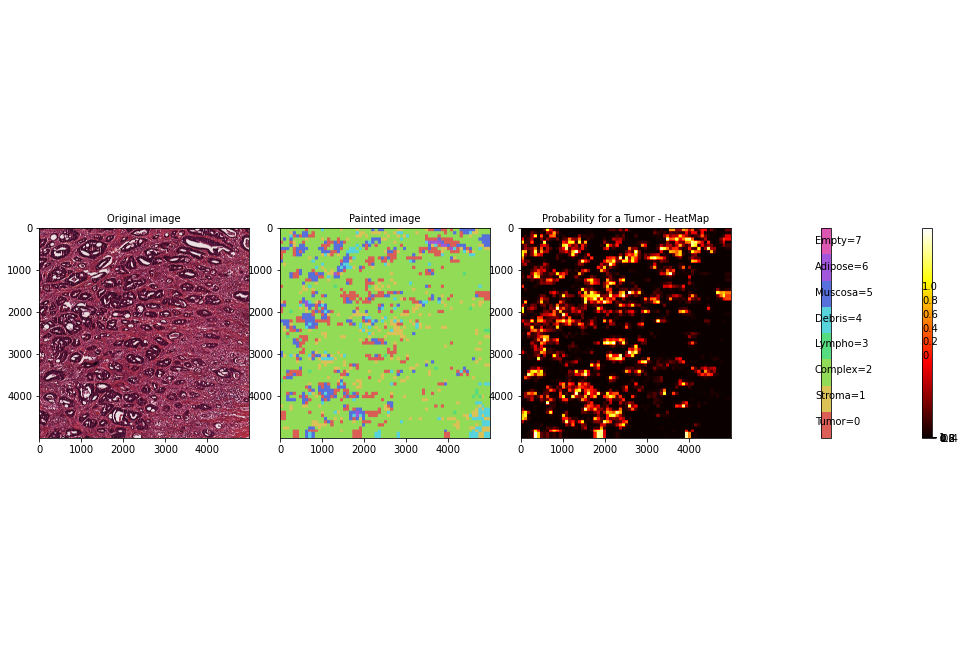

In [ ]:
plot_results(large_images[1])

**Image No.3**

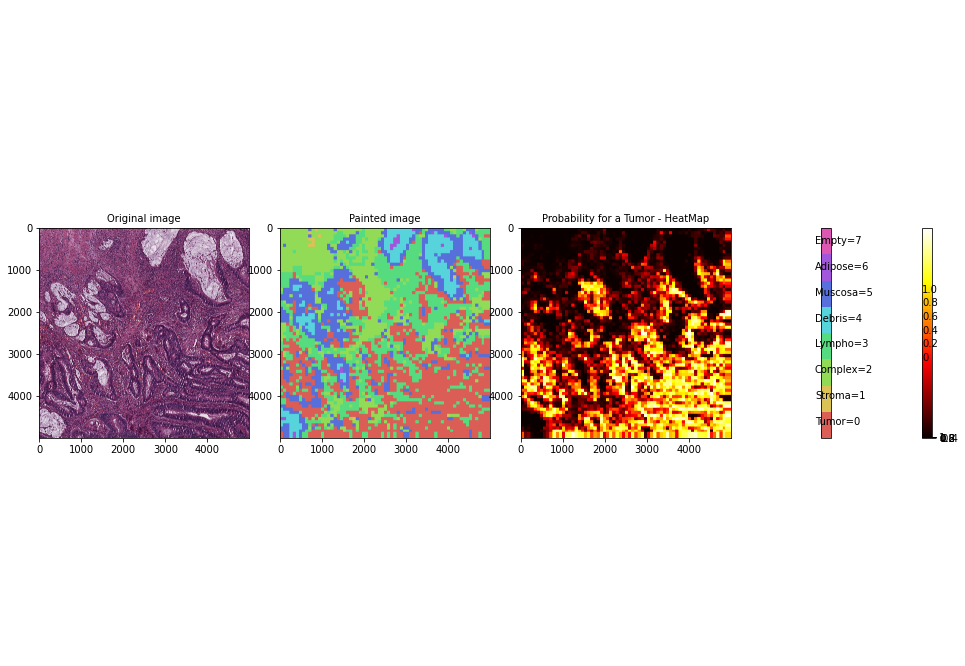

In [ ]:
plot_results(large_images[2])

**Image No.4**

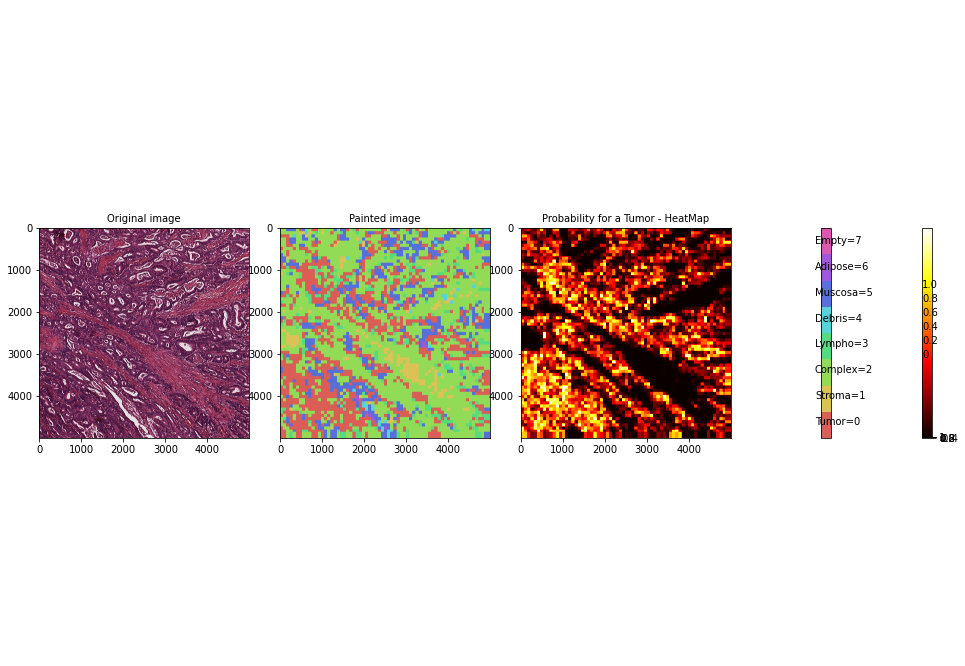

In [ ]:
plot_results(large_images[3])

**Image No.5**

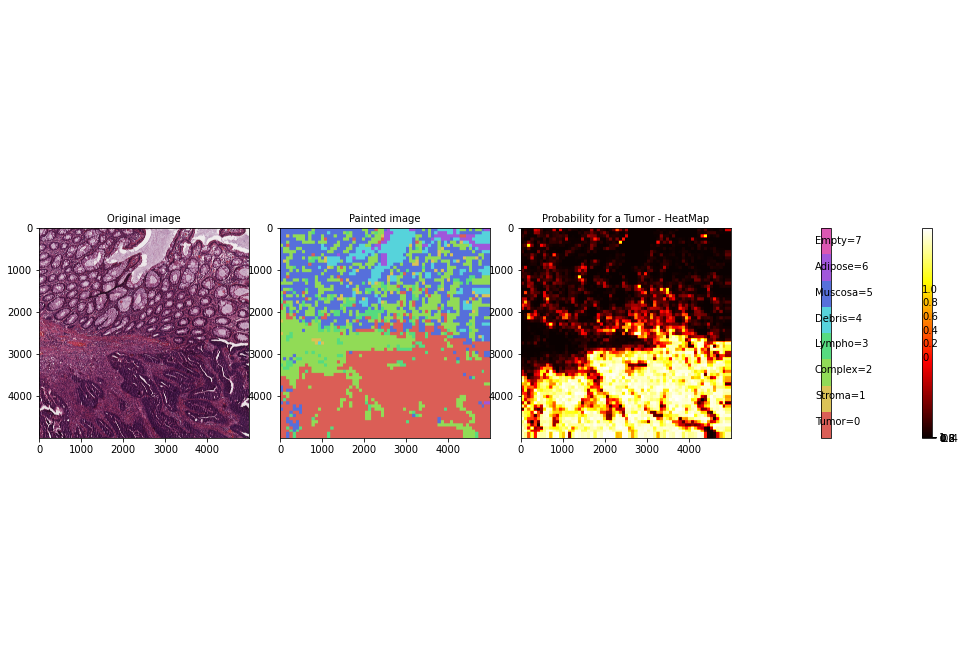

In [ ]:
plot_results(large_images[4])

**Image No.6**

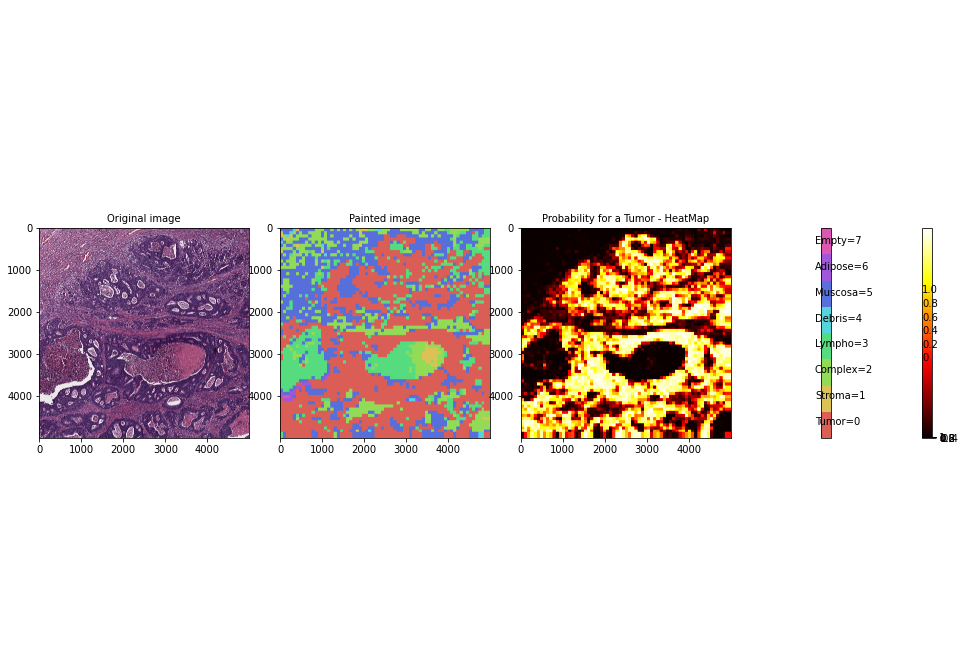

In [ ]:
plot_results(large_images[5])

**Image No.7**

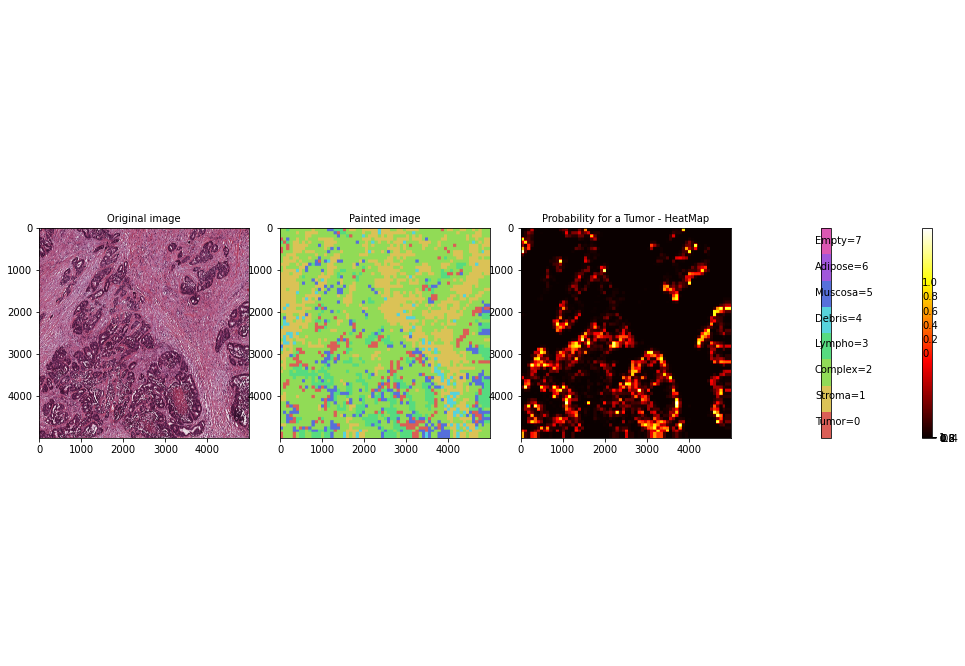

In [ ]:
plot_results(large_images[6])

**Image No.8**

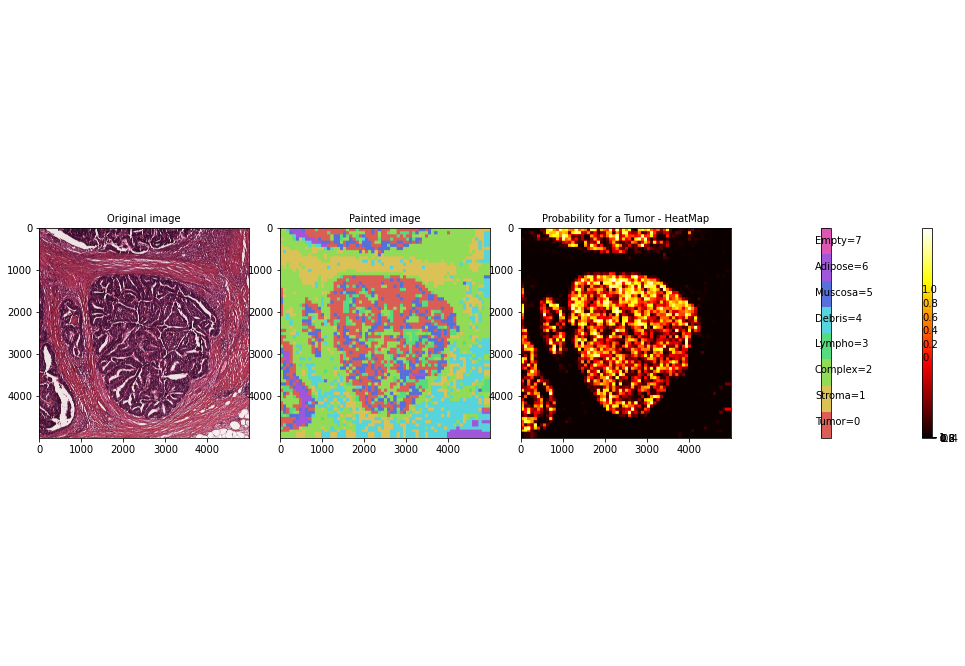

In [ ]:
plot_results(large_images[7])

**Image No.9**

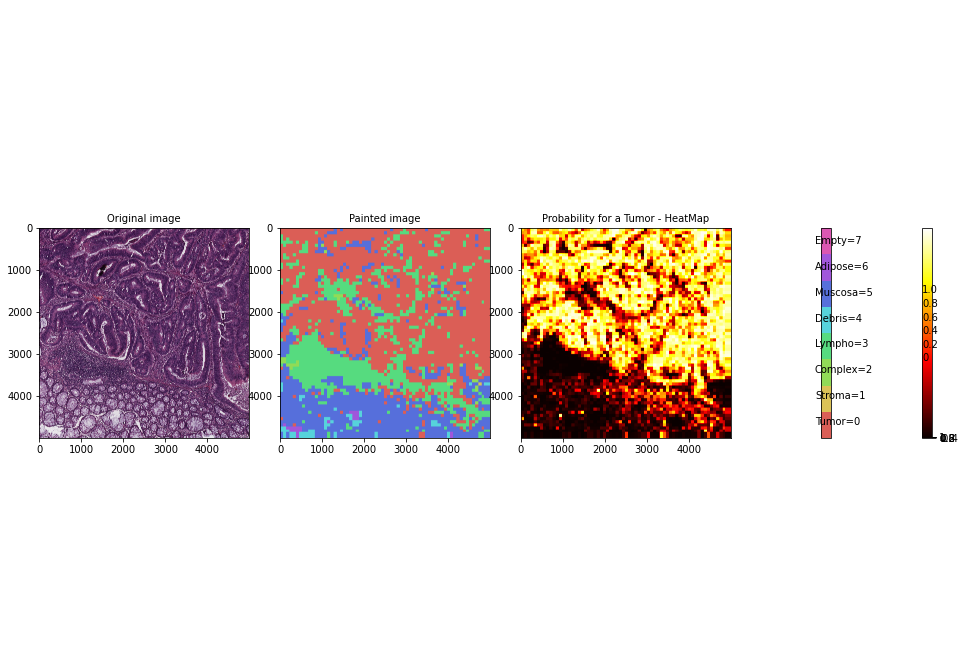

In [ ]:
plot_results(large_images[8])

**Image No.10**

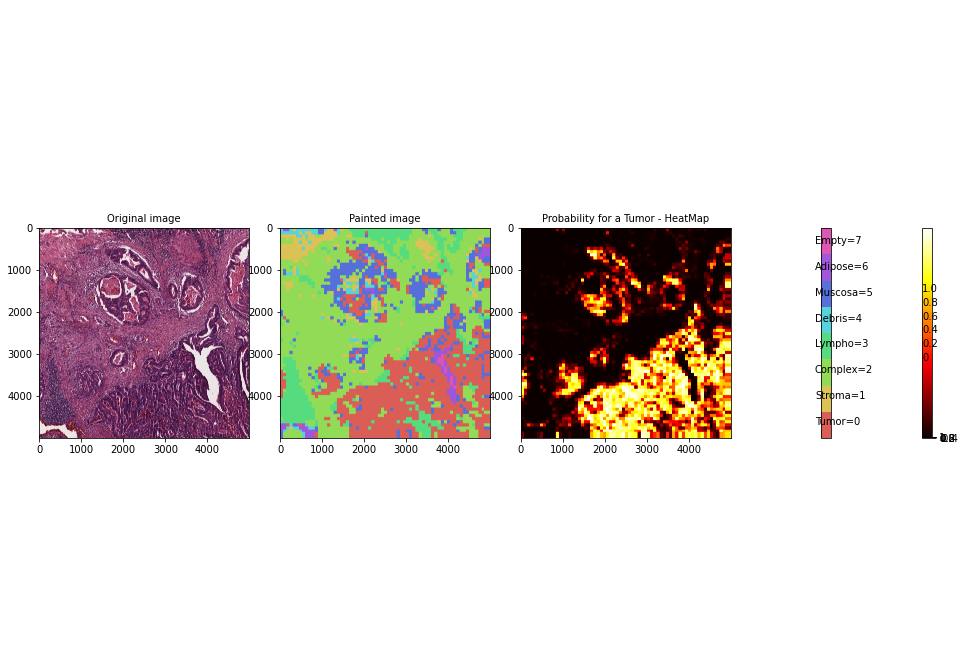

In [ ]:
plot_results(large_images[9])

# Links that we used:
https://www.tensorflow.org/datasets/api_docs/python/tfds

Datasets:
1. https://www.tensorflow.org/datasets/catalog/colorectal_histology

2. https://www.tensorflow.org/datasets/catalog/colorectal_histology_large

3. https://stackoverflow.com/questions/43197474/how-to-customize-the-colorbar-in-python